   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Adding Multiple Indicators)


In [266]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [267]:
import warnings
warnings.filterwarnings("ignore")

In [268]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1H"
NUM_FEATURES = 0

In [269]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_ASK_1H_14F.csv
EURUSD_FULL_1D_20F.csv
EURUSD_FULL_1H_20F.csv
EURUSD_FULL_1M_20F.csv
EURUSD_FULL_4H_20F.csv


## Read CSV

### Read Dataset From Regression

In [270]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[2], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Sp

### Add EMA Function

In [271]:
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(com=0.5).mean(), name = 'EMA_Close_' + str(n))
    df = df.join(EMA)  
    return df

In [272]:
DATASET_FULL = EMA(DATASET_FULL, 5)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,EMA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.00010,Thursday,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.259100
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.00010,Thursday,3,0.000326,0.000326,0.000000,0.000000,0.000000,0.000000,1.259407
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.00015,Thursday,3,0.000000,-0.000326,0.000000,0.000000,0.000000,0.000000,1.259478
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.00015,Thursday,3,-0.000651,-0.000651,0.000000,0.000000,0.000000,0.000000,1.258946
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.00010,Thursday,3,0.000644,0.001295,1.259262,0.000000,0.000000,0.000000,1.259317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,...,0.00001,Friday,4,0.000009,-0.000739,1.109920,1.110070,1.106276,1.097224,1.109928
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.00035,Friday,4,0.000658,0.000649,1.109922,1.110212,1.106510,1.097302,1.110449
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,...,0.00011,Sunday,6,0.000630,-0.000027,1.110242,1.110356,1.106743,1.097392,1.111090
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,...,0.00005,Sunday,6,-0.000162,-0.000792,1.110660,1.110488,1.106952,1.097474,1.111183


In [273]:
DATASET_FULL['EMA_Close_5'].describe()

count    102514.000000
mean          1.264048
std           0.122824
min           1.036483
25%           1.149928
50%           1.270629
75%           1.350856
max           1.600537
Name: EMA_Close_5, dtype: float64

In [274]:
DATASET_FULL['EMA_Close_5'].isnull().sum()

0

(102514, 21)


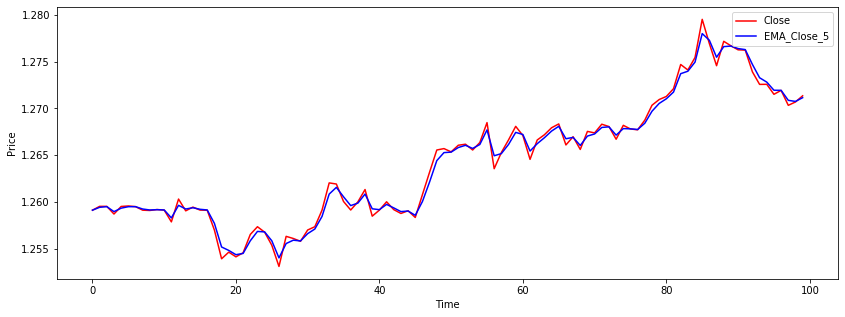

In [275]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['EMA_Close_5'][INICIO:FIN], color = 'blue', label = 'EMA_Close_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

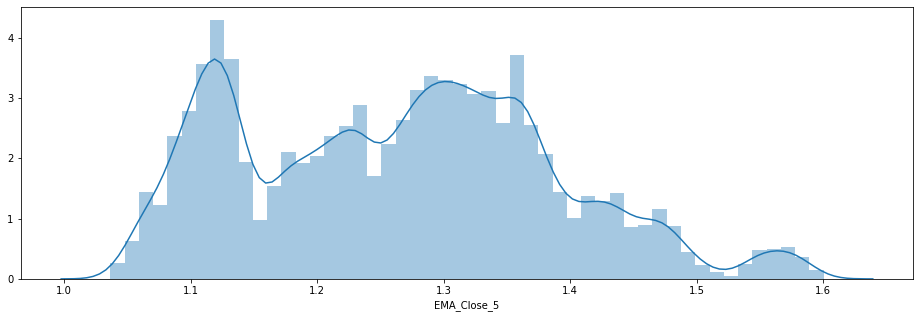

In [276]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['EMA_Close_5']);

### MOM Function

In [277]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [278]:
DATASET_FULL = MOM(DATASET_FULL, 1)
DATASET_FULL = MOM(DATASET_FULL, 2)
DATASET_FULL = MOM(DATASET_FULL, 5)
DATASET_FULL = MOM(DATASET_FULL, 24)
print(DATASET_FULL)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Pct_Range_

In [279]:
print(DATASET_FULL['Momentum_5'].describe())
print(DATASET_FULL['Momentum_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Momentum_5'].isnull().sum())

count    102509.000000
mean         -0.000007
std           0.003464
min          -0.040300
25%          -0.001440
50%           0.000000
75%           0.001450
max           0.038150
Name: Momentum_5, dtype: float64
5
0


(102514, 25)


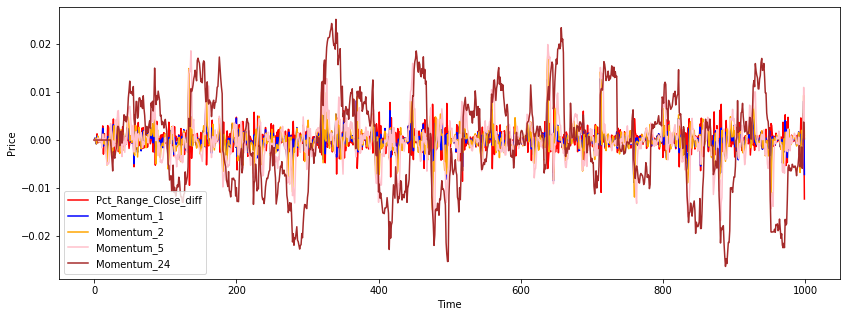

In [280]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Momentum_1'][INICIO:FIN], color = 'blue', label = 'Momentum_1')
pyplot.plot(DATASET_FULL['Momentum_2'][INICIO:FIN], color = 'orange', label = 'Momentum_2')
pyplot.plot(DATASET_FULL['Momentum_5'][INICIO:FIN], color = 'pink', label = 'Momentum_5')
pyplot.plot(DATASET_FULL['Momentum_24'][INICIO:FIN], color = 'brown', label = 'Momentum_24')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

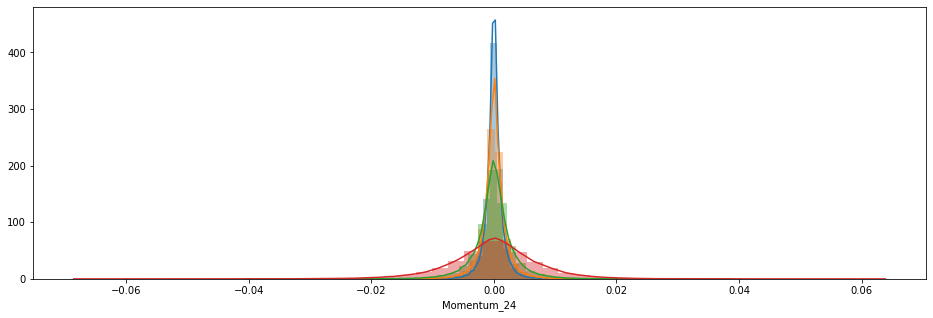

In [281]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Momentum_1']);
sns.distplot(DATASET_FULL['Momentum_2']);
sns.distplot(DATASET_FULL['Momentum_5']);
sns.distplot(DATASET_FULL['Momentum_24']);


In [282]:
def get_rsi(df, n=14):
    deltas = (df['Close']-df['Close'].shift(1)).fillna(0)

    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1
    df['rsi'] = rsi_series /100
    return df

In [283]:
DATASET_FULL = get_rsi(DATASET_FULL, 14)

In [284]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,EMA_Close_5,Momentum_1,Momentum_2,Momentum_5,Momentum_24,rsi
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.000000,0.000000,0.000000,0.000000,1.259100,0.00000,0.00000,0.00000,0.00000,0.000000
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.000000,0.000000,0.000000,0.000000,1.259407,0.00041,0.00000,0.00000,0.00000,0.000000
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.000000,0.000000,0.000000,0.000000,1.259478,0.00000,0.00041,0.00000,0.00000,0.000000
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.000000,0.000000,0.000000,0.000000,1.258946,-0.00082,-0.00082,0.00000,0.00000,0.000000
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,1.259262,0.000000,0.000000,0.000000,1.259317,0.00081,-0.00001,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,...,1.109920,1.110070,1.106276,1.097224,1.109928,0.00001,0.00084,-0.00258,0.00283,0.534606
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,1.109922,1.110212,1.106510,1.097302,1.110449,0.00073,0.00074,0.00001,0.00289,0.568363
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,...,1.110242,1.110356,1.106743,1.097392,1.111090,0.00070,0.00143,0.00160,0.00349,0.598441
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,...,1.110660,1.110488,1.106952,1.097474,1.111183,-0.00018,0.00052,0.00209,0.00382,0.587111


(102514, 26)


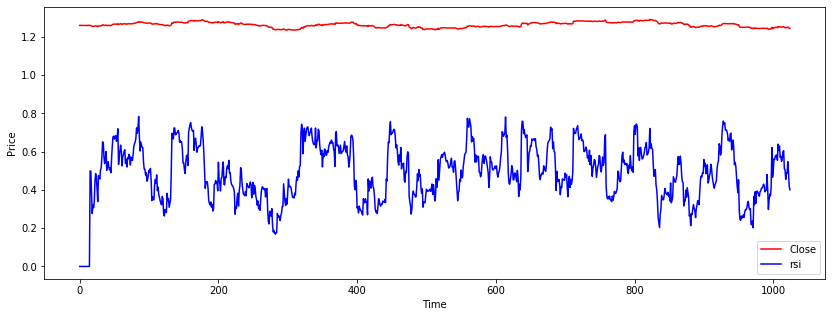

In [285]:
INICIO = 0
FIN = 1025
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['rsi'][INICIO:FIN], color = 'blue', label = 'rsi')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [286]:
print(DATASET_FULL['rsi'].describe())
print(DATASET_FULL['rsi'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['rsi'].isnull().sum())

count    102514.000000
mean          0.499742
std           0.128211
min           0.000000
25%           0.410072
50%           0.501064
75%           0.589373
max           0.947763
Name: rsi, dtype: float64
0
0


In [287]:
#Bollinger Bands  
def BBANDS(df, n):  
    no_of_std = 1.5
    MA = pd.Series(pd.Series(df['Close'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['Close'].rolling(n).std()))  
    
    
    df['Rolling_Mean'+ str(n)] = MA
    df['Bollinger_High'] = MA + (MSD * no_of_std)
    df['Bollinger_Low'] = MA - (MSD * no_of_std)
    
    return df

In [288]:
DATASET_FULL = BBANDS(DATASET_FULL, 25)
#DATASET_FULL = BBANDS(DATASET_FULL, 25)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  MA_Close_200  \
102509   1.10995   1.11066  1.10859    1.10997  ...      1.097224   
102510   1.10993   1.11085  1.10979    1.11036  ...      1.097302   
102511   1.11129   1.11194  1.11123    1.11130  ...      1.097392   
102512   1.11130   1.11144  1.11023    1.11118  ...      1.097474   
102513   1.11119   1.11195  1.11113    1.11156  ...      1.097563   

        EMA_Close_5 Momentum_1  Momentum_2  Momentum_5  Momentum_24       rsi  \
102509     1.109928    0.00001     

In [289]:
print(DATASET_FULL['Rolling_Mean25'].describe())
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())

count    102490.000000
mean          1.264066
std           0.122791
min           1.038964
25%           1.149779
50%           1.270798
75%           1.350949
max           1.597393
Name: Rolling_Mean25, dtype: float64
24
0


In [290]:
print(DATASET_FULL['Bollinger_High'].describe())
print(DATASET_FULL['Bollinger_High'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_High'].isnull().sum())

count    102514.000000
mean          1.268029
std           0.123436
min           1.040885
25%           1.153417
50%           1.274883
75%           1.354406
max           1.602564
Name: Bollinger_High, dtype: float64
0
0


In [291]:
print(DATASET_FULL['Bollinger_Low'].describe())
print(DATASET_FULL['Bollinger_Low'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_Low'].isnull().sum())

count    102514.000000
mean          1.260099
std           0.122176
min           1.036625
25%           1.146186
50%           1.266600
75%           1.346729
max           1.594183
Name: Bollinger_Low, dtype: float64
0
0


(102514, 29)


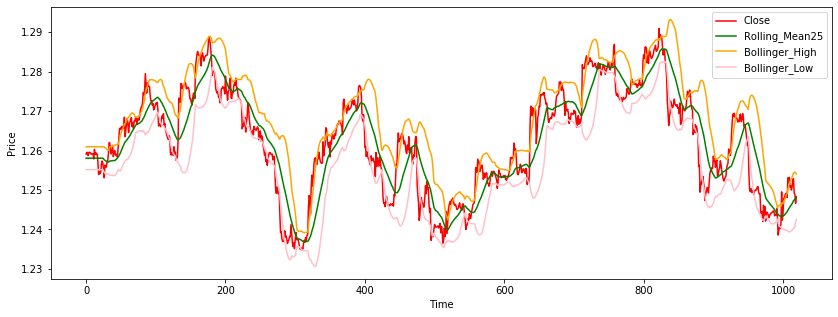

In [292]:
INICIO = 0
FIN = 1020
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Rolling_Mean25'][INICIO:FIN], color = 'green', label = 'Rolling_Mean25')
pyplot.plot(DATASET_FULL['Bollinger_High'][INICIO:FIN], color = 'orange', label = 'Bollinger_High')
pyplot.plot(DATASET_FULL['Bollinger_Low'][INICIO:FIN], color = 'pink', label = 'Bollinger_Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [293]:
#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

In [294]:
DATASET_FULL = PPSR(DATASET_FULL)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Rolling_Mean25  \
102509   1.10995   1.11066  1.10859    1.10997  ...        1.110070   
102510   1.10993   1.11085  1.10979    1.11036  ...        1.110212   
102511   1.11129   1.11194  1.11123    1.11130  ...        1.110356   
102512   1.11130   1.11144  1.11023    1.11118  ...        1.110488   
102513   1.11119   1.11195  1.11113    1.11156  ...        1.110655   

        Bollinger_High Bollinger_Low        PP        R1        S1        R2  \
102509        1.113055  

In [295]:
print(DATASET_FULL['S2'].describe())
print(DATASET_FULL['S2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['S2'].isnull().sum())

count    102514.000000
mean          1.261970
std           0.122450
min           1.032187
25%           1.148302
50%           1.268237
75%           1.348517
max           1.597733
Name: S2, dtype: float64
0
0


(102514, 36)


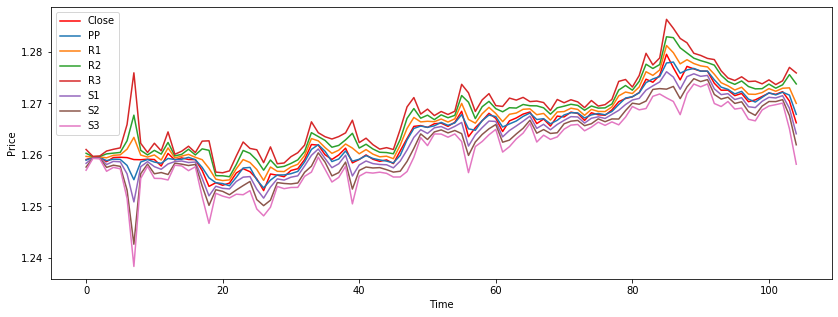

In [296]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['PP'][INICIO:FIN], label = 'PP')
pyplot.plot(DATASET_FULL['R1'][INICIO:FIN], label = 'R1')
pyplot.plot(DATASET_FULL['R2'][INICIO:FIN], label = 'R2')
pyplot.plot(DATASET_FULL['R3'][INICIO:FIN], label = 'R3')
pyplot.plot(DATASET_FULL['S1'][INICIO:FIN], label = 'S1')
pyplot.plot(DATASET_FULL['S2'][INICIO:FIN], label = 'S2')
pyplot.plot(DATASET_FULL['S3'][INICIO:FIN], label = 'S3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [297]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

In [298]:
DATASET_FULL = STOK(DATASET_FULL)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Bollinger_High  \
102509   1.10995   1.11066  1.10859    1.10997  ...        1.113055   
102510   1.10993   1.11085  1.10979    1.11036  ...        1.113059   
102511   1.11129   1.11194  1.11123    1.11130  ...        1.113122   
102512   1.11130   1.11144  1.11023    1.11118  ...        1.113158   
102513   1.11119   1.11195  1.11113    1.11156  ...        1.113162   

        Bollinger_Low        PP        R1        S1        R2        S2  \
102509       1.107085  1.1097

In [299]:
print(DATASET_FULL['SO%k'].describe())
print(DATASET_FULL['SO%k'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k'].isnull().sum())

count    102513.000000
mean          0.501679
std           0.284807
min           0.000000
25%           0.257143
50%           0.503106
75%           0.747475
max           1.000000
Name: SO%k, dtype: float64
1
0


(102514, 37)


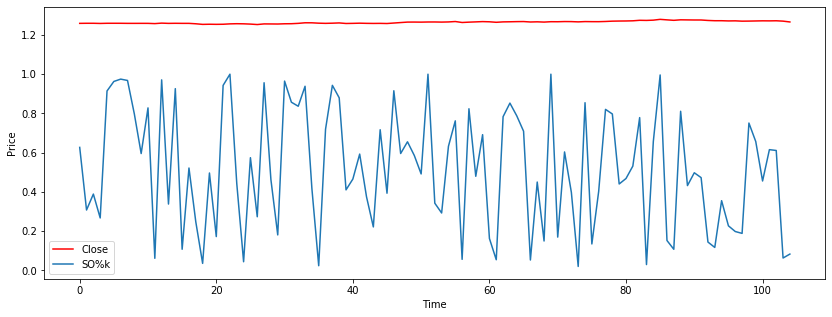

In [300]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k'][INICIO:FIN], label = 'SO%k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [301]:
# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  

In [302]:
DATASET_FULL = STO(DATASET_FULL,1,2)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        PP        R1  \
102509   1.10995   1.11066  1.10859    1.10997  ...  1.109767  1.110913   
102510   1.10993   1.11085  1.10979    1.11036  ...  1.110490  1.111160   
102511   1.11129   1.11194  1.11123    1.11130  ...  1.111647  1.111933   
102512   1.11130   1.11144  1.11023    1.11118  ...  1.110997  1.111713   
102513   1.11119   1.11195  1.11113    1.11156  ...  1.111587  1.111983   

              S1        R2        S2        R3        S3      SO%k     SO%k1  \


In [303]:
print(DATASET_FULL['SO%k1'].describe())
print(DATASET_FULL['SO%k1'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k1'].isnull().sum())

print(DATASET_FULL['SO%d2'].describe())
print(DATASET_FULL['SO%d2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%d2'].isnull().sum())

count    102514.000000
mean          0.501680
std           0.284806
min           0.000000
25%           0.257143
50%           0.503106
75%           0.747475
max           1.000000
Name: SO%k1, dtype: float64
0
0
count    102514.000000
mean          0.501680
std           0.197337
min           0.012589
25%           0.341962
50%           0.503158
75%           0.663001
max           0.989202
Name: SO%d2, dtype: float64
0
0


(102514, 39)


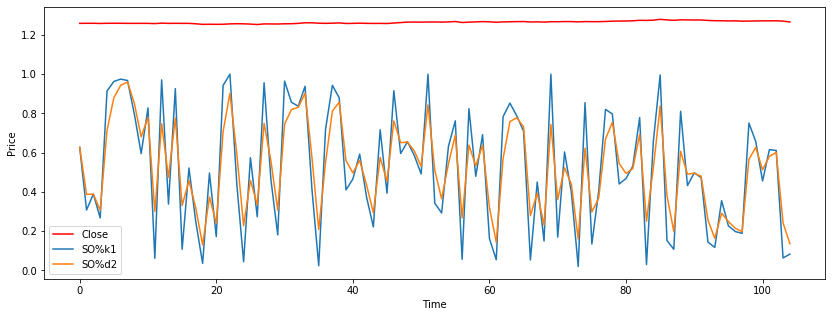

In [304]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k1'][INICIO:FIN], label = 'SO%k1')
pyplot.plot(DATASET_FULL['SO%d2'][INICIO:FIN], label = 'SO%d2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [305]:
#Trix  
def TRIX(df, n):  
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()  
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [306]:
DATASET_FULL = TRIX(DATASET_FULL,5)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        R1        S1  \
102509   1.10995   1.11066  1.10859    1.10997  ...  1.110913  1.108833   
102510   1.10993   1.11085  1.10979    1.11036  ...  1.111160  1.110040   
102511   1.11129   1.11194  1.11123    1.11130  ...  1.111933  1.111123   
102512   1.11130   1.11144  1.11023    1.11118  ...  1.111713  1.110513   
102513   1.11119   1.11195  1.11113    1.11156  ...  1.111983  1.111183   

              R2        S2        R3        S3      SO%k     SO%k1     SO%d2  \


In [307]:
print(DATASET_FULL['Trix_5'].describe())
print(DATASET_FULL['Trix_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Trix_5'].isnull().sum())

count    102505.000000
mean         -0.000001
std           0.000335
min          -0.003704
25%          -0.000155
50%           0.000002
75%           0.000156
max           0.003414
Name: Trix_5, dtype: float64
9
0


(102514, 40)


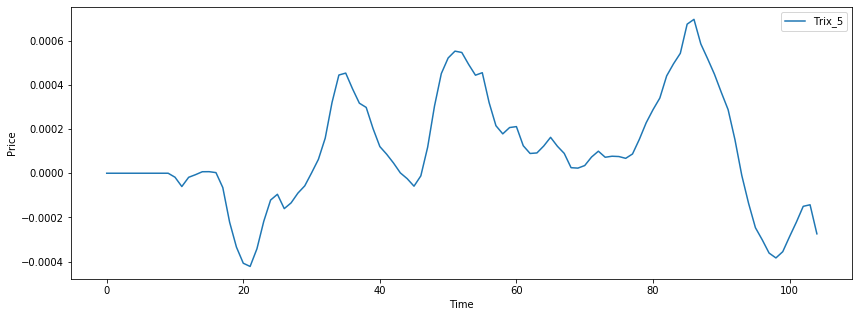

In [308]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Trix_5'][INICIO:FIN], label = 'Trix_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [309]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Close'].ewm(span = n_fast, min_periods = n_slow-1).mean())
    EMAslow = pd.Series(df['Close'].ewm(span = n_slow, min_periods = n_fast-1).mean())
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [310]:
DATASET_FULL = MACD(DATASET_FULL,5,25)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        S2        R3  \
102509   1.10995   1.11066  1.10859    1.10997  ...  1.107687  1.112993   
102510   1.10993   1.11085  1.10979    1.11036  ...  1.109370  1.112280   
102511   1.11129   1.11194  1.11123    1.11130  ...  1.110837  1.112743   
102512   1.11130   1.11144  1.11023    1.11118  ...  1.109797  1.112913   
102513   1.11119   1.11195  1.11113    1.11156  ...  1.110787  1.112783   

              S3      SO%k     SO%k1     SO%d2    Trix_5  MACD_5_25  \
102509  1

In [311]:
print(DATASET_FULL['MACD_5_25'].describe())
print(DATASET_FULL['MACD_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACD_5_25'].isnull().sum())



count    102491.000000
mean         -0.000014
std           0.002839
min          -0.020185
25%          -0.001442
50%           0.000025
75%           0.001464
max           0.024277
Name: MACD_5_25, dtype: float64
23
0


In [312]:
print(DATASET_FULL['MACDsign_5_25'].describe())
print(DATASET_FULL['MACDsign_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACDsign_5_25'].isnull().sum())

print(DATASET_FULL['MACDdiff_5_25'].describe())
print(DATASET_FULL['MACDdiff_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACDdiff_5_25'].isnull().sum())

count    102514.000000
mean         -0.000014
std           0.002582
min          -0.017768
25%          -0.001348
50%           0.000026
75%           0.001372
max           0.018848
Name: MACDsign_5_25, dtype: float64
0
0
count    1.025140e+05
mean     8.702021e-08
std      1.054012e-03
min     -1.193121e-02
25%     -5.120318e-04
50%      5.527972e-06
75%      5.191413e-04
max      1.063718e-02
Name: MACDdiff_5_25, dtype: float64
0
0


(102514, 43)


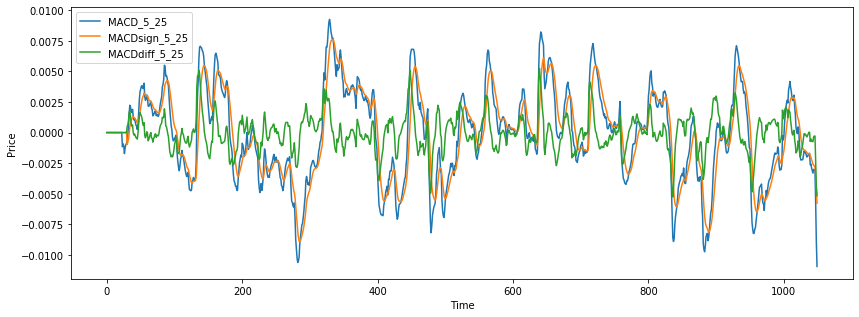

In [313]:
INICIO = 0
FIN = 1050
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['MACD_5_25'][INICIO:FIN], label = 'MACD_5_25')
pyplot.plot(DATASET_FULL['MACDsign_5_25'][INICIO:FIN], label = 'MACDsign_5_25')
pyplot.plot(DATASET_FULL['MACDdiff_5_25'][INICIO:FIN], label = 'MACDdiff_5_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [314]:
#Mass Index  
def MassI(df, period = 25, min_periods = 8, span=9):  
    Range = df['High'] - df['Low']  
    EX1 = Range.ewm(span = 9, min_periods = 8).mean()
    EX2 = EX1.ewm(span = 9, min_periods = 8).mean()
    Mass = EX1 / EX2  
    MassI = pd.Series(Mass.rolling(period).sum(),name = 'Mass_Index_'+str(period)+'_'+str(min_periods)+'_'+str(span))  
    df = df.join(MassI)  
    return df

In [315]:
DATASET_FULL = MassI(DATASET_FULL,25,8,9)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        R3        S3  \
102509   1.10995   1.11066  1.10859    1.10997  ...  1.112993  1.106753   
102510   1.10993   1.11085  1.10979    1.11036  ...  1.112280  1.108920   
102511   1.11129   1.11194  1.11123    1.11130  ...  1.112743  1.110313   
102512   1.11130   1.11144  1.11023    1.11118  ...  1.112913  1.109313   
102513   1.11119   1.11195  1.11113    1.11156  ...  1.112783  1.110383   

            SO%k     SO%k1     SO%d2    Trix_5  MACD_5_25  MACDsign_5_25  \
1025

In [316]:
print(DATASET_FULL['Mass_Index_25_8_9'].describe())
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
#DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())

count    102476.000000
mean         24.894148
std           0.997007
min          13.667327
25%          24.313442
50%          24.883983
75%          25.456946
max          36.640975
Name: Mass_Index_25_8_9, dtype: float64
38
0


(102514, 44)


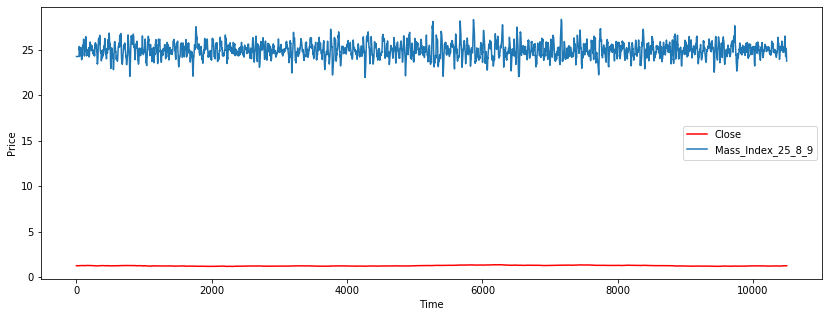

In [317]:
INICIO = 0
FIN = 10500
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Mass_Index_25_8_9'][INICIO:FIN], label = 'Mass_Index_25_8_9')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [318]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'R-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

R-EURUSD_FULL_1H_44F.csv


In [319]:
DATASET_FULL.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_200', 'EMA_Close_5',
       'Momentum_1', 'Momentum_2', 'Momentum_5', 'Momentum_24', 'rsi',
       'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'PP', 'R1', 'S1',
       'R2', 'S2', 'R3', 'S3', 'SO%k', 'SO%k1', 'SO%d2', 'Trix_5', 'MACD_5_25',
       'MACDsign_5_25', 'MACDdiff_5_25', 'Mass_Index_25_8_9'],
      dtype='object')

In [320]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados-regression/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)